In [2]:
# Part A
# Data Understanding
# Set up and Read the data
import pandas as pd
import sqlite3
import seaborn as sns

# Read csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_transactions.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Connect to database
conn = sqlite3.connect("RFMdb")
cur = conn.cursor()

In [4]:
# Load CRM data into the RFMdb database
data.to_sql("data", conn)

1048567

In [5]:
# Check if data is inserted into data/RFMdb
data = pd.read_sql('SELECT * FROM data', conn)
data


,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
1048562,1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   index                    1048567 non-null  int64  
 1   TransactionID            1048567 non-null  object 
 2   CustomerID               1048567 non-null  object 
 3   CustomerDOB              1045170 non-null  object 
 4   CustGender               1047467 non-null  object 
 5   CustLocation             1048416 non-null  object 
 6   CustAccountBalance       1046198 non-null  float64
 7   TransactionDate          1048567 non-null  object 
 8   TransactionTime          1048567 non-null  int64  
 9   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 80.0+ MB


In [7]:
# Change data types
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], dayfirst=True)
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], dayfirst=True)

data.info()

<ipython-input-7-646043f93537>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], dayfirst=True)
<ipython-input-7-646043f93537>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], dayfirst=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   index                    1048567 non-null  int64         
 1   TransactionID            1048567 non-null  object        
 2   CustomerID               1048567 non-null  object        
 3   CustomerDOB              1045170 non-null  datetime64[ns]
 4   CustGender               1047467 non-null  object        
 5   CustLocation             1048416 non-null  object        
 6   CustAccountBalance       1046198 non-null  float64       
 7   TransactionDate          1048567 non-null  datetime64[ns]
 8   TransactionTime          1048567 non-null  int64         
 9   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 80.0+ MB


In [8]:
# Missing data handling
# Find the number of missing value in the dataset:
data.isnull().sum()

,0
index,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
# Find the percentage of missing data per variable:
data.isna().sum()/len(data)*100

,0
index,0.000000
TransactionID,0.000000
CustomerID,0.000000
CustomerDOB,0.323966
CustGender,0.104905
CustLocation,0.014401
CustAccountBalance,0.225927
TransactionDate,0.000000
TransactionTime,0.000000
TransactionAmount (INR),0.000000


In [10]:
# Remove instances with missing values:
data = data.dropna(subset=['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   index                    1041614 non-null  int64         
 1   TransactionID            1041614 non-null  object        
 2   CustomerID               1041614 non-null  object        
 3   CustomerDOB              1041614 non-null  datetime64[ns]
 4   CustGender               1041614 non-null  object        
 5   CustLocation             1041614 non-null  object        
 6   CustAccountBalance       1041614 non-null  float64       
 7   TransactionDate          1041614 non-null  datetime64[ns]
 8   TransactionTime          1041614 non-null  int64         
 9   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 79.5+ MB


In [11]:
# Remove instances with invalid age values:
from datetime import datetime

todayDate = datetime.today()
dropIndexes = data[(data['CustomerDOB'] > todayDate) | (data['CustomerDOB'].dt.year < 1900)].index
data = data.drop(dropIndexes)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880532 entries, 0 to 1041613
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    880532 non-null  int64         
 1   TransactionID            880532 non-null  object        
 2   CustomerID               880532 non-null  object        
 3   CustomerDOB              880532 non-null  datetime64[ns]
 4   CustGender               880532 non-null  object        
 5   CustLocation             880532 non-null  object        
 6   CustAccountBalance       880532 non-null  float64       
 7   TransactionDate          880532 non-null  datetime64[ns]
 8   TransactionTime          880532 non-null  int64         
 9   TransactionAmount (INR)  880532 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 73.9+ MB


In [12]:
# Remove invalid transaction amount values:
data = data[data['TransactionAmount (INR)'] > 0].reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879905 entries, 0 to 879904
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    879905 non-null  int64         
 1   TransactionID            879905 non-null  object        
 2   CustomerID               879905 non-null  object        
 3   CustomerDOB              879905 non-null  datetime64[ns]
 4   CustGender               879905 non-null  object        
 5   CustLocation             879905 non-null  object        
 6   CustAccountBalance       879905 non-null  float64       
 7   TransactionDate          879905 non-null  datetime64[ns]
 8   TransactionTime          879905 non-null  int64         
 9   TransactionAmount (INR)  879905 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 67.1+ MB


In [13]:
# Display the 5 top Locations where the maximum number of transactions occurred
topLocations = data['CustLocation'].value_counts().head(5)

topLocations

,count
CustLocation,
MUMBAI,86290
BANGALORE,70701
NEW DELHI,66209
GURGAON,62752
DELHI,60510


In [14]:
# Perform RFM Segmentation
# Overwrite the data in the RFMdb database with the processed data
data.to_sql("data", conn, if_exists="replace", index=False)

# Clean data and group transactions by CustomerId
cleanData = pd.read_sql(''' SELECT CustomerID,
                   MAX(TransactionDate) AS lastTransactionDate,
                   COUNT(*) AS countTransactions,
                   SUM("TransactionAmount (INR)") AS totalTransactionAmount
            FROM data
            GROUP BY CustomerID ''', conn)

# Write clean CRM data into the database
cleanData.to_sql("cleanData", conn, if_exists="replace", index=False)

761507

In [15]:
data1 = pd.read_sql('SELECT * FROM cleanData', conn)
data1

,CustomerID,lastTransactionDate,countTransactions,totalTransactionAmount
0,C1010011,2016-09-26 00:00:00,2,5106.0
1,C1010012,2016-08-14 00:00:00,1,1499.0
2,C1010014,2016-08-07 00:00:00,2,1455.0
3,C1010018,2016-09-15 00:00:00,1,30.0
4,C1010028,2016-08-29 00:00:00,1,557.0
...,...,...,...,...
761502,C9099836,2016-08-07 00:00:00,1,691.0
761503,C9099877,2016-09-15 00:00:00,1,222.0
761504,C9099919,2016-08-18 00:00:00,1,126.0
761505,C9099941,2016-08-28 00:00:00,1,50.0


In [16]:
data1.dtypes

,0
CustomerID,object
lastTransactionDate,object
countTransactions,int64
totalTransactionAmount,float64


In [17]:
# Create date variable that records recency
import numpy as np
import datetime

data1['lastTransactionDate'] = pd.to_datetime(data1['lastTransactionDate'])

# Create snapshot date
snapshot_date = data1['lastTransactionDate'].max() + datetime.timedelta(days=1)
print(snapshot_date)

2016-10-22 00:00:00


In [18]:
# Aggregate data by each customer
customers = data1.groupby(['CustomerID']).agg({
   'lastTransactionDate': lambda x: (snapshot_date - x.max()).days,
   'countTransactions':'sum' ,
   'totalTransactionAmount': 'sum'})

In [19]:
# Rename columns
customers.rename(columns = {'lastTransactionDate': 'Recency',
                            'countTransactions': 'Frequency',
                            'totalTransactionAmount': 'MonetaryValue'}, inplace=True)

In [20]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010028,54,1,557.0
...,...,...,...
C9099836,76,1,691.0
C9099877,37,1,222.0
C9099919,65,1,126.0


Text(0.5, 1.0, 'Histogram and Recency')

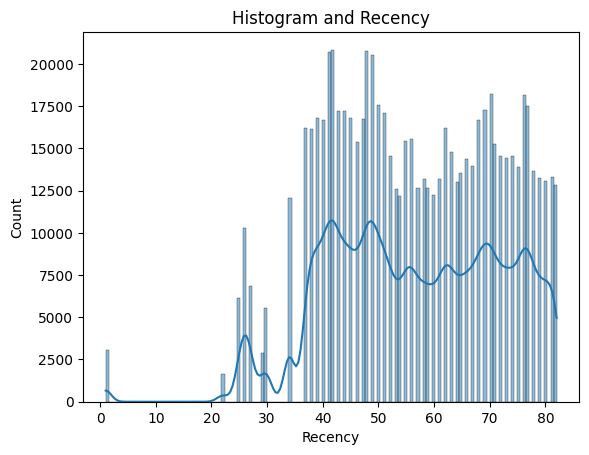

In [21]:
# Plot the histogram of Regency
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='Recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

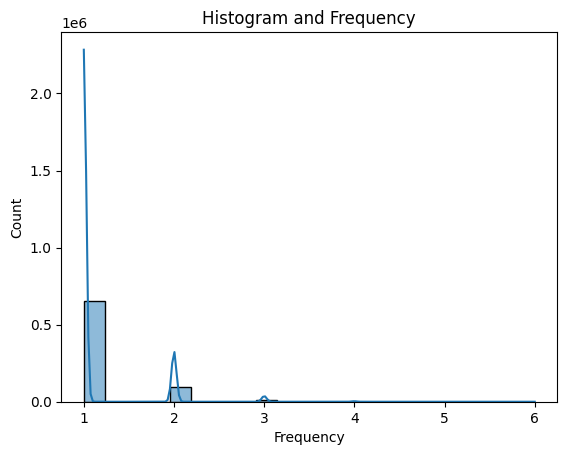

In [23]:
# Plot the histogram of Frequency
fig, ax = plt.subplots()
sns.histplot(data=customers, x='Frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

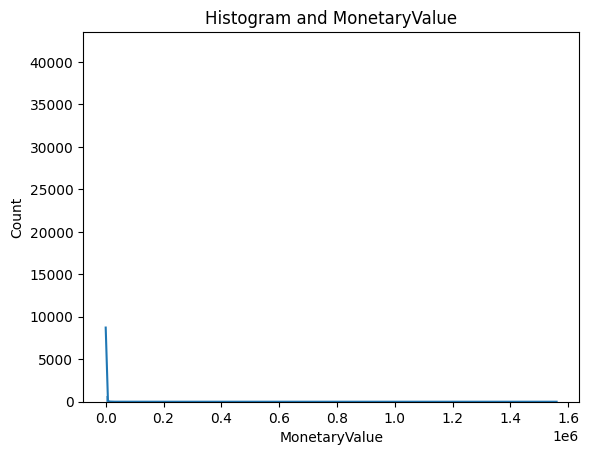

In [24]:
# Plot the histogram of Monetary Values
fig, ax = plt.subplots()
sns.histplot(data=customers, x='MonetaryValue', kde=True)
ax.set_title('Histogram and MonetaryValue')

<ipython-input-22-bdab7c3980dd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
<ipython-input-22-bdab7c3980dd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
<ipython-input-22-bdab7c3980dd>:11: UserWarn

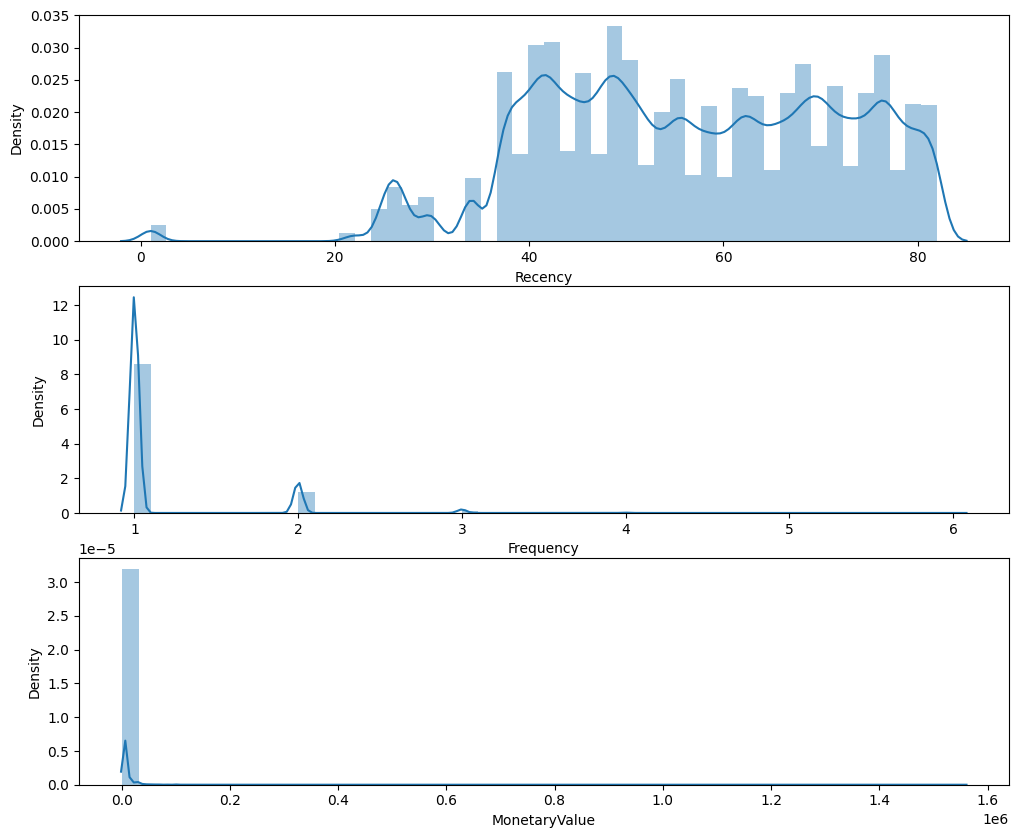

In [22]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers['MonetaryValue'])

# Show the plot
plt.show()

In [23]:
# Apply box-cox transformation to remove skewness in the data
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

,Recency,Frequency,MonetaryValue
761502,143.008266,0.0,7.667832
761503,60.374962,0.0,6.159652
761504,118.644834,0.0,5.437219
761505,97.154322,0.0,4.299305
761506,41.275064,0.0,7.959874


<ipython-input-24-1f6251b0b85d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
<ipython-input-24-1f6251b0b85d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
<ipython-input-24-1f6251b0b85d>:11: 

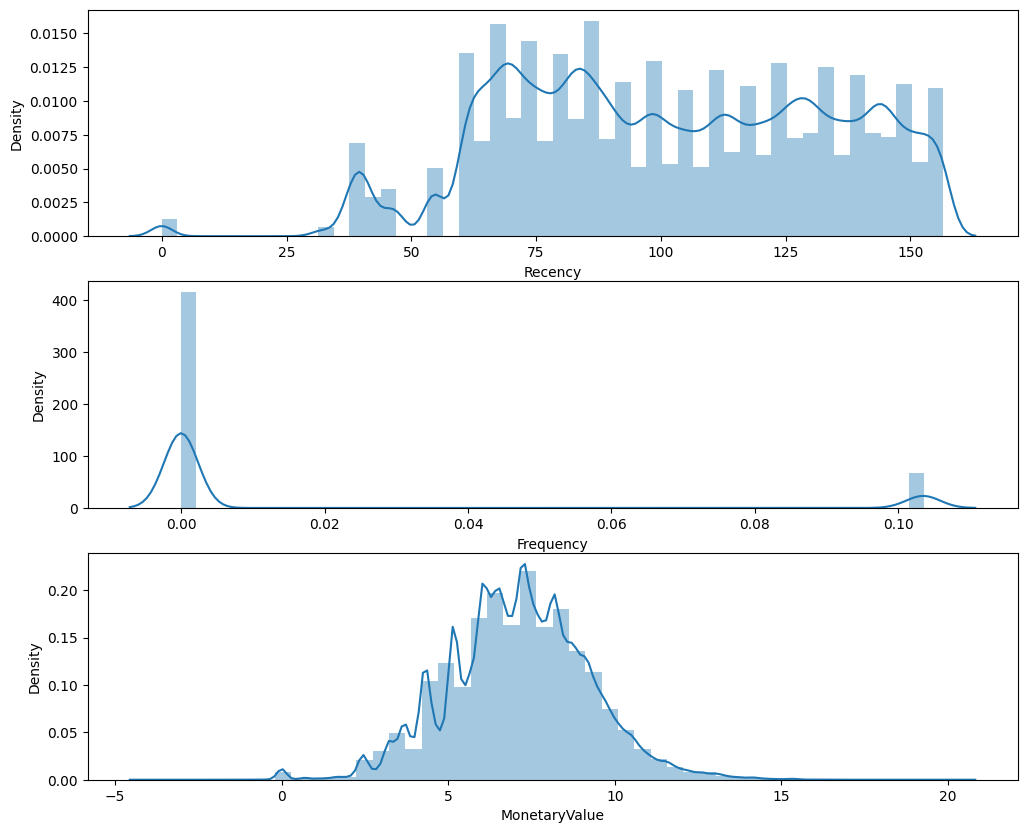

In [24]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])

# Show the plot
plt.show()

In [25]:
# Normalise the transformed data
# Import library
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0. -0.]
[1. 1. 1.]


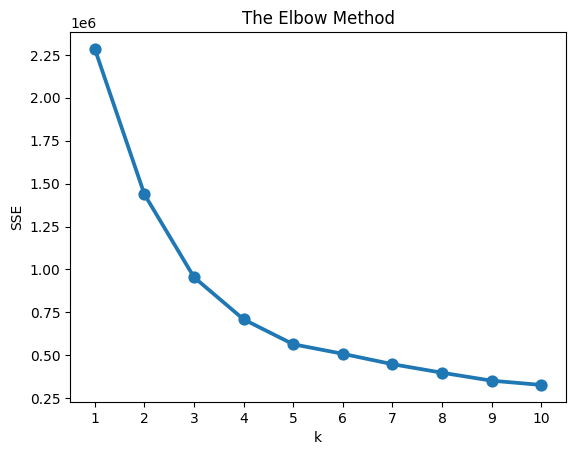

In [26]:
# Implement K-Means
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=67)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

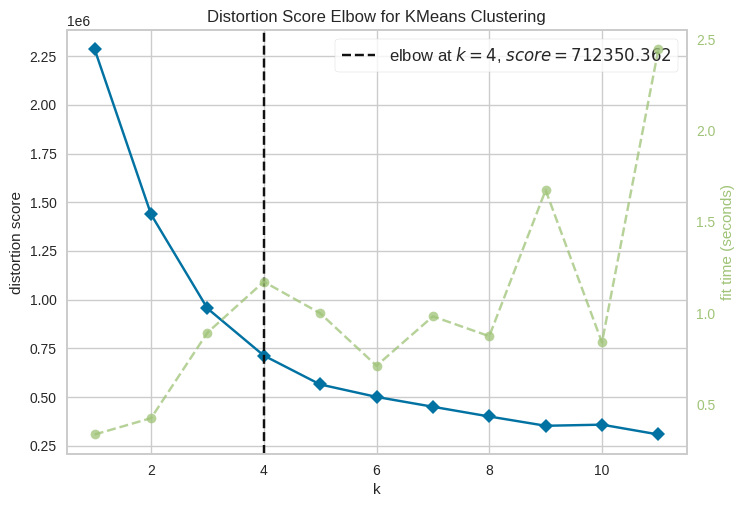

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)
visualizer.show()

,Recency,Frequency,MonetaryValue
Cluster,,,
0,226760,226760,226760
1,185347,185347,185347
2,105700,105700,105700
3,243700,243700,243700


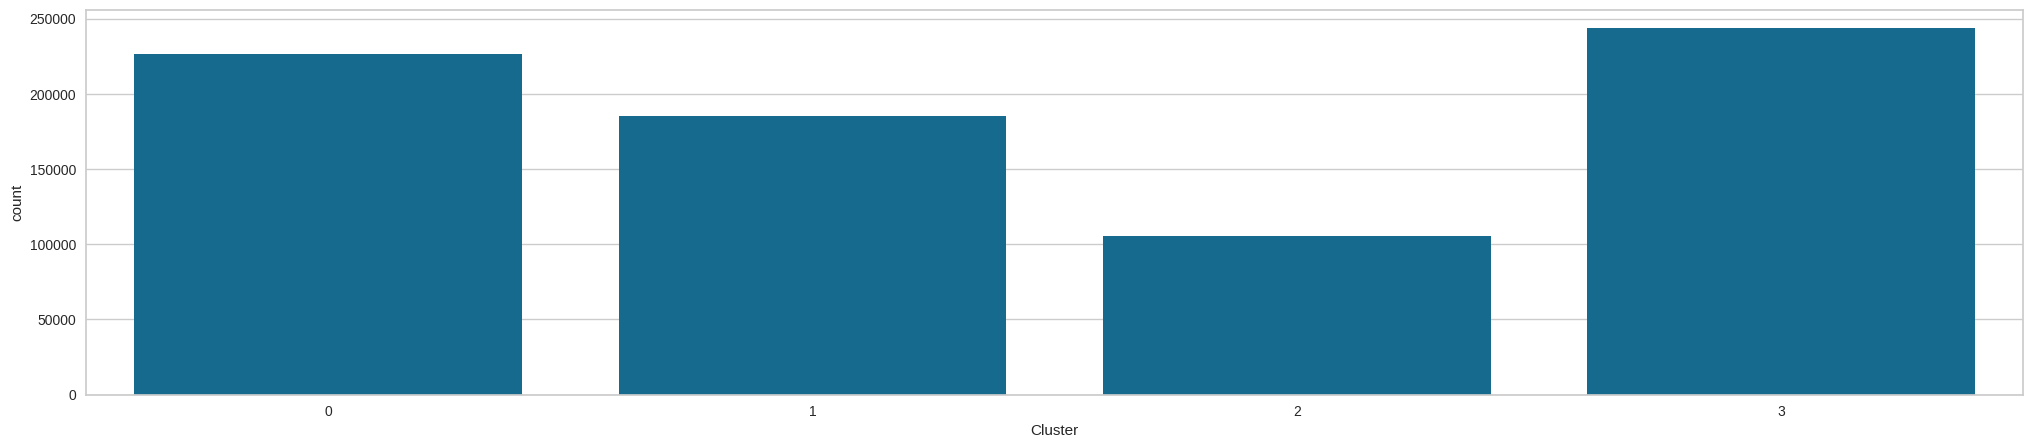

In [28]:
# Analyse the data with k=4
model = KMeans(n_clusters=4, random_state=67)
model.fit(customers_normalized)
model.labels_.shape
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=customers)
customers.groupby(['Cluster']).count()

In [29]:
# Summarise the RFM table
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue        
           mean      mean          mean   count
Cluster                                        
0         71.30      1.00       2010.32  226760
1         60.50      1.00         92.99  185347
2         48.70      2.12       2680.44  105700
3         43.25      1.00       1488.62  243700

In [37]:
customers

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
C1010011,26,2,5106.0,2
C1010012,69,1,1499.0,0
C1010014,76,2,1455.0,2
C1010018,37,1,30.0,1
C1010028,54,1,557.0,3
...,...,...,...,...
C9099836,76,1,691.0,0
C9099877,37,1,222.0,3
C9099919,65,1,126.0,1


In [31]:
# Analyse the segments using snake plot
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,C1010011,2,Recency,-1.934096
1,C1010012,0,Recency,0.816122
2,C1010014,2,Recency,1.303295
3,C1010018,1,Recency,-1.279453
4,C1010028,3,Recency,-0.195880


<Axes: xlabel='Attribute', ylabel='Value'>

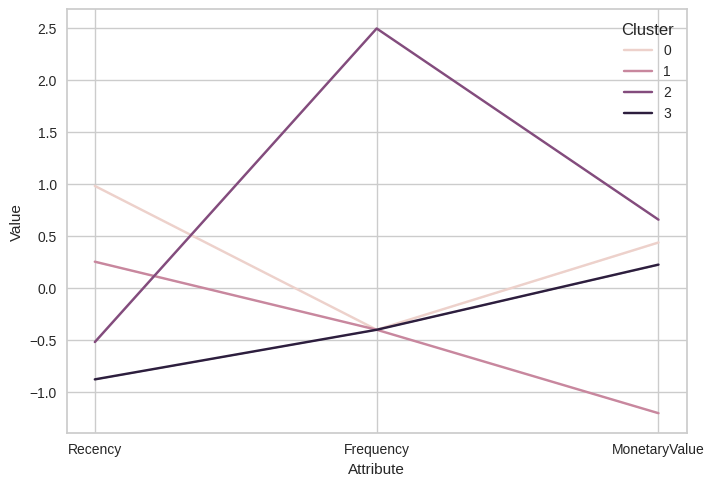

In [32]:
# Visualise it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

In [40]:
# Extract location data from raw transactions
location_df = data[['CustomerID', 'CustLocation']].drop_duplicates()

# Merge locations into customers
customers_with_location = pd.merge(customers.reset_index(), location_df, on='CustomerID', how='left')



# Get top 5 locations by number of customers
top5_locs = customers_with_location['CustLocation'].value_counts().nlargest(5).index

# Filter for only those locations
filtered = customers_with_location[customers_with_location['CustLocation'].isin(top5_locs)]

# Cluster count per location
cluster_per_location = filtered.groupby(['CustLocation', 'Cluster']).size().unstack().fillna(0)

# Normalize to get percentage distribution
cluster_percent = cluster_per_location.div(cluster_per_location.sum(axis=1), axis=0).round(2)

# View results
print(cluster_percent)

from IPython.display import display

# Display the cluster percentage table nicely
display(cluster_percent)


Cluster          0     1     2     3
CustLocation                        
BANGALORE     0.28  0.19  0.25  0.29
DELHI         0.26  0.21  0.25  0.28
GURGAON       0.27  0.19  0.24  0.29
MUMBAI        0.29  0.16  0.24  0.30
NEW DELHI     0.28  0.18  0.25  0.29


Cluster,0,1,2,3
CustLocation,,,,
BANGALORE,0.28,0.19,0.25,0.29
DELHI,0.26,0.21,0.25,0.28
GURGAON,0.27,0.19,0.24,0.29
MUMBAI,0.29,0.16,0.24,0.30
NEW DELHI,0.28,0.18,0.25,0.29


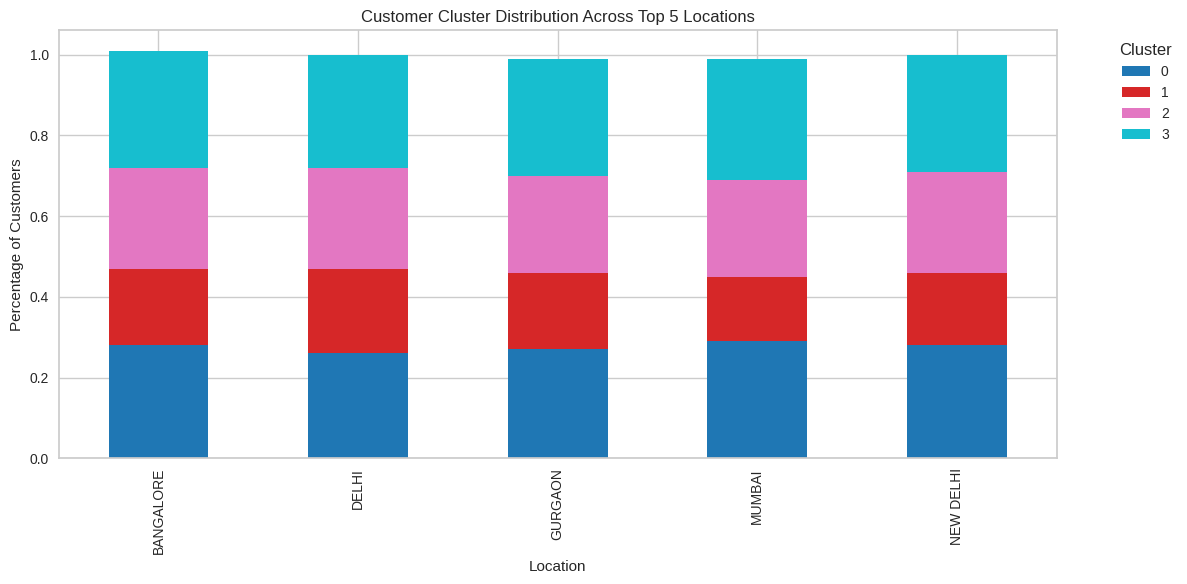

In [39]:
cluster_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')
plt.title("Customer Cluster Distribution Across Top 5 Locations")
plt.ylabel("Percentage of Customers")
plt.xlabel("Location")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
customers_with_location

,CustomerID,Recency,Frequency,MonetaryValue,Cluster,CustLocation
0,C1010011,26,2,5106.0,2,NOIDA
1,C1010011,26,2,5106.0,2,NEW DELHI
2,C1010012,69,1,1499.0,0,MUMBAI
3,C1010014,76,2,1455.0,2,MUMBAI
4,C1010018,37,1,30.0,1,CHAMPARAN
...,...,...,...,...,...,...
874094,C9099836,76,1,691.0,0,BHIWANDI
874095,C9099877,37,1,222.0,3,BANGALORE
874096,C9099919,65,1,126.0,1,GUNTUR
874097,C9099941,55,1,50.0,1,CHENNAI
